### Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Polynomail Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

#Random Forest Regression (Tree-Based Model)
from sklearn.ensemble import RandomForestRegressor

#Artifical Neural Network (ANN)
from sklearn.neural_network import MLPRegressor

#XGBoost Regressor
from xgboost import XGBRegressor

#Support Vector machine (SVR)
from sklearn.svm import SVR

#Gradient Boosting Regressor (LightGBM)
from sklearn.ensemble import GradientBoostingRegressor


### Reading Data

In [30]:
df= pd.read_csv("distill_data.csv")

### Basic Data Information and data Cleaning

In [31]:
df.head(10)

,R,xF,F_mol_s,xD,Qreb_kW
0,0.8,0.200000,27.777778,0.506215,891.026
1,0.8,0.239474,27.777778,0.559365,898.859
2,0.8,0.278947,27.777778,0.604117,906.811
3,0.8,0.318421,27.777778,0.642199,914.868
4,0.8,0.357895,27.777778,0.674904,923.024
5,0.8,0.397368,27.777778,0.703218,931.270
6,0.8,0.436842,27.777778,0.727903,939.600
7,0.8,0.476316,27.777778,0.749561,948.011
8,0.8,0.515789,27.777778,0.768672,956.487
9,0.8,0.555263,27.777778,0.785623,965.026


In [32]:
df.tail(10)

,R,xF,F_mol_s,xD,Qreb_kW
1190,5.0,0.594737,19.444444,0.998844,921.600
1191,5.0,0.634211,19.444444,0.998951,923.891
1192,5.0,0.673684,19.444444,0.999041,926.225
1193,5.0,0.713158,19.444444,0.999116,928.598
1194,5.0,0.752632,19.444444,0.999181,931.003
1195,5.0,0.792105,19.444444,0.999238,933.441
1196,5.0,0.831579,19.444444,0.999287,935.908
1197,5.0,0.871053,19.444444,0.999331,938.401
1198,5.0,0.910526,19.444444,0.999370,940.917
1199,5.0,0.950000,19.444444,0.999404,943.456


In [33]:
df.describe()

,R,xF,F_mol_s,xD,Qreb_kW
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2.900000,0.575000,27.777778,0.926038,1187.094033
std,1.275183,0.227711,6.806975,0.103343,310.832742
min,0.800000,0.200000,19.444444,0.506215,623.699000
25%,1.849997,0.387500,19.444444,0.884742,891.960000
50%,2.900000,0.575000,27.777778,0.980954,1207.680000
75%,3.950003,0.762500,36.111111,0.997127,1449.622500
max,5.000000,0.950000,36.111111,0.999404,1752.170000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R        1200 non-null   float64
 1   xF       1200 non-null   float64
 2   F_mol_s  1200 non-null   float64
 3   xD       1200 non-null   float64
 4   Qreb_kW  1200 non-null   float64
dtypes: float64(5)
memory usage: 47.0 KB


In [35]:
df.isna().sum()

,0
R,0
xF,0
F_mol_s,0
xD,0
Qreb_kW,0


### Basic EDA

### basic Histogram for features distribution

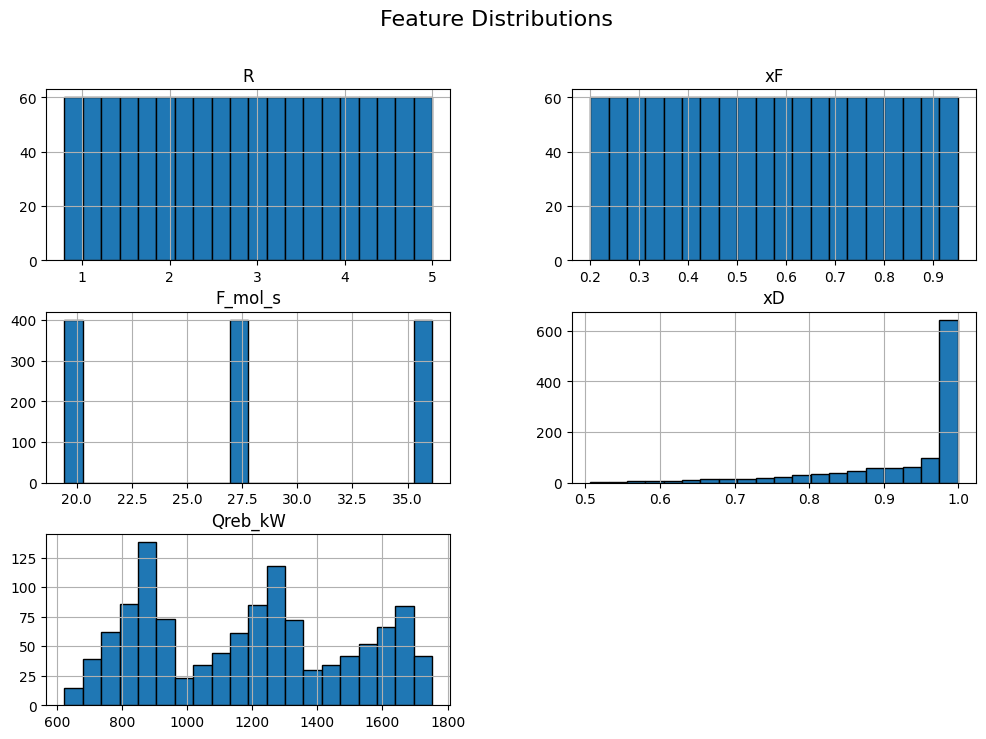

In [36]:
df.hist(bins=20 , figsize=(12,8) , edgecolor = "black")
plt.suptitle("Feature Distributions" , fontsize = 16)
plt.show()


### Scatter plot : xD VS inputs and Qreb_KW vs Inputs

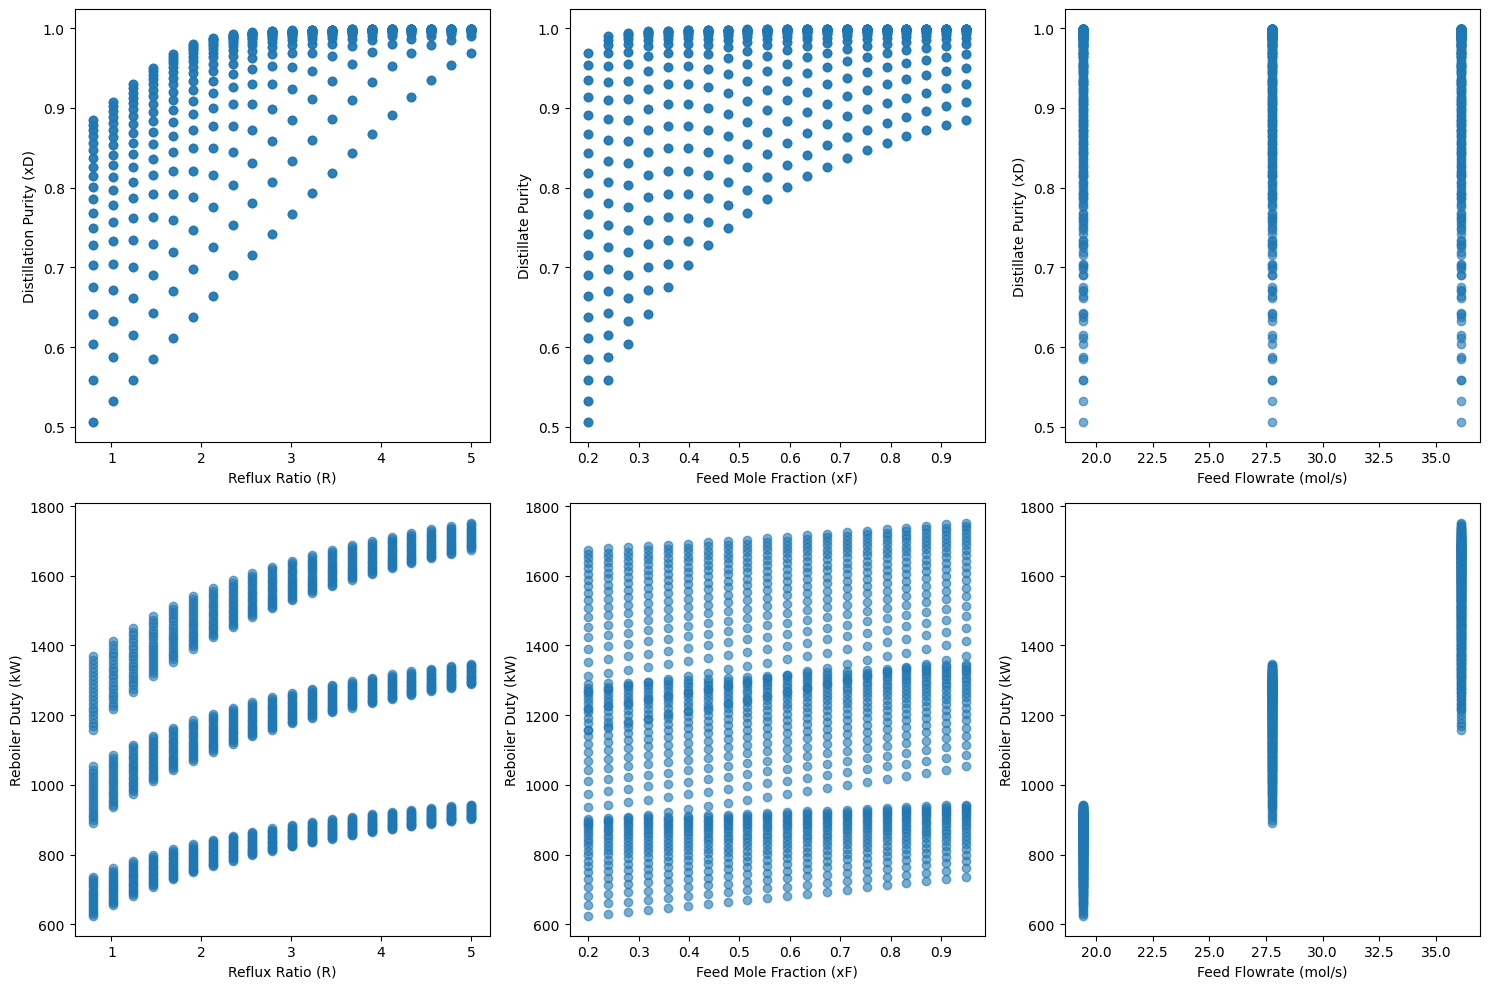

In [37]:
fig , axes = plt.subplots(2,3, figsize=(15,10))

axes[0][0].scatter(df["R"] , df["xD"] , alpha=0.6)
axes[0,0].set_xlabel("Reflux Ratio (R)")
axes[0,0].set_ylabel("Distillation Purity (xD)")

axes[0,1].scatter(df["xF"],df["xD"] , alpha=0.6)
axes[0,1].set_xlabel("Feed Mole Fraction (xF)")
axes[0,1].set_ylabel("Distillate Purity")

axes[0,2].scatter(df["F_mol_s"], df["xD"], alpha=0.6)
axes[0,2].set_xlabel("Feed Flowrate (mol/s)"); axes[0,2].set_ylabel("Distillate Purity (xD)")

axes[1,0].scatter(df["R"], df["Qreb_kW"], alpha=0.6)
axes[1,0].set_xlabel("Reflux Ratio (R)"); axes[1,0].set_ylabel("Reboiler Duty (kW)")

axes[1,1].scatter(df["xF"], df["Qreb_kW"], alpha=0.6)
axes[1,1].set_xlabel("Feed Mole Fraction (xF)"); axes[1,1].set_ylabel("Reboiler Duty (kW)")

axes[1,2].scatter(df["F_mol_s"], df["Qreb_kW"], alpha=0.6)
axes[1,2].set_xlabel("Feed Flowrate (mol/s)"); axes[1,2].set_ylabel("Reboiler Duty (kW)")

plt.tight_layout()
plt.show()

### HeatMap

Text(0.5, 1.0, 'Correlation Heatmap')

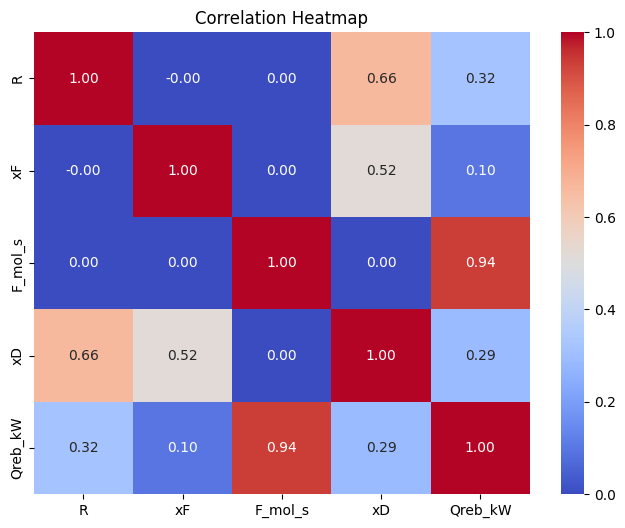

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr() , annot = True , cmap="coolwarm" , fmt=".2f")
plt.title("Correlation Heatmap")

## Spliting Data In Train/Test/ Validate Block

In [39]:
# Define block split: hold out rows with R in [3.5, 4.5] for test set
test_block = df[(df["R"] >= 3.5) & (df["R"] <= 4.5)]
train_val_block = df[~((df["R"] >= 3.5) & (df["R"] <= 4.5))]

In [40]:
# Split train/validation (70/30)
train_block , val_block = train_test_split(train_val_block,test_size=0.3 , random_state=42)


# Shapes
split_shapes = {
    "Train": train_block.shape,
    "Validation": val_block.shape,
    "Test": test_block.shape
}

split_shapes

{'Train': (672, 5), 'Validation': (288, 5), 'Test': (240, 5)}

In [41]:
# Define Inputs (X) and Outputs (y):
#   Inputs (X): R, xF, F_mol_s
#   Outputs (y): xD, Qreb_kW

X_train = train_block[["R","xF","F_mol_s"]]
y_train = train_block[["xD","Qreb_kW"]]

X_val = val_block[["R","xF","F_mol_s"]]
y_val = val_block[["xD","Qreb_kW"]]

X_test = test_block[["R","xF","F_mol_s"]]
y_test = test_block[["xD","Qreb_kW"]]

In [42]:
from sklearn.preprocessing import StandardScaler

# Scaling the Data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)


[link text](https://)## Polynomail Regression

In [43]:
# Polynomial expansion (degree = 2 or 3)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_ploy = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit regression
reg = LinearRegression()
reg.fit(X_train_poly , y_train_scaled)

# Predicitons
y_val_pred = scaler_y.inverse_transform(reg.predict(X_val_ploy))
y_test_pred = scaler_y.inverse_transform(reg.predict(X_test_poly))

# Metrics on Validation
mae = mean_absolute_error(y_val,y_val_pred , multioutput="raw_values")
rmse = np.sqrt(mean_squared_error(y_val,y_val_pred , multioutput="raw_values"))
r2 = r2_score(y_val,y_val_pred,multioutput="raw_values")

print("Validation Metrics (xD, Qreb_kW):")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Validation Metrics (xD, Qreb_kW):
MAE: [0.01482868 7.05095026]
RMSE: [0.0191424  9.28448582]
R²: [0.97044239 0.99912113]


## Random Forest Regression (Tree-Based Model)

In [44]:
# Train
rf = RandomForestRegressor(n_estimators=200 , random_state=42)
rf.fit(X_train_scaled , y_train_scaled)

# Predict
y_val_pred_rf = scaler_y.inverse_transform(rf.predict(X_val_scaled))
y_test_pred_rf = scaler_y.inverse_transform(rf.predict(X_test_scaled))

#Metrics
mae_rf = mean_absolute_error(y_val , y_val_pred_rf , multioutput="raw_values")
rmse_rf = np.sqrt(mean_squared_error(y_val , y_val_pred_rf , multioutput="raw_values"))
r2_rf = r2_score(y_val , y_val_pred_rf , multioutput="raw_values")

print("Random Forest Validation Metrics (xD, Qreb_kW):")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest Validation Metrics (xD, Qreb_kW):
MAE: [5.13382877e-03 6.06231674e+00]
RMSE: [9.01412335e-03 9.50490970e+00]
R²: [0.99344574 0.9990789 ]


## Artifical Neural Network (ANN)

In [45]:
# ANN with 2 hidden layers
ann = MLPRegressor(hidden_layer_sizes=(64,32) , activation="relu" , solver="adam" , max_iter=500 , random_state=42)

ann.fit(X_train_scaled , y_train_scaled)

# Predict
y_val_pred_ann = scaler_y.inverse_transform(ann.predict(X_val_scaled))
y_test_pred_ann = scaler_y.inverse_transform(ann.predict(X_test_scaled))

# Metrics
mae_ann = mean_absolute_error(y_val, y_val_pred_ann, multioutput='raw_values')
rmse_ann = np.sqrt(mean_squared_error(y_val, y_val_pred_ann, multioutput='raw_values'))
r2_ann = r2_score(y_val, y_val_pred_ann, multioutput='raw_values')

print("ANN Validation Metrics (xD, Qreb_kW):")
print("MAE:", mae_ann)
print("RMSE:", rmse_ann)
print("R²:", r2_ann)

ANN Validation Metrics (xD, Qreb_kW):
MAE: [6.55684046e-03 7.76030986e+00]
RMSE: [8.94828877e-03 9.85731665e+00]
R²: [0.99354113 0.99900933]


## XGBoost Regressor

In [46]:
xgb = XGBRegressor(n_estimators=500 , learning_rate = 0.05 , max_depth = 6 , random_state = 42 )

# Multi-output  wrapper since XGB handles only single target
from sklearn.multioutput import MultiOutputRegressor
xgb_multi= MultiOutputRegressor(xgb)

xgb_multi.fit(X_train_scaled, y_train_scaled)

y_val_pred_xgb = scaler_y.inverse_transform(xgb_multi.predict(X_val_scaled))
y_test_pred_xgb = scaler_y.inverse_transform(xgb_multi.predict(X_test_scaled))

mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb, multioutput='raw_values')
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb, multioutput='raw_values'))
r2_xgb = r2_score(y_val, y_val_pred_xgb, multioutput='raw_values')

print("XGBoost Validation Metrics (xD, Qreb_kW):")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

XGBoost Validation Metrics (xD, Qreb_kW):
MAE: [5.9248216e-04 2.9236059e+00]
RMSE: [1.0451587e-03 4.7793837e+00]
R²: [0.9999119 0.9997671]


## Support Vector machine (SVR)

In [47]:
svr = SVR(kernel="rbf" , C=100 , gamma= 0.1 , epsilon= 0.01)

svr_multi = MultiOutputRegressor(svr)
svr_multi.fit(X_train_scaled , y_train_scaled)

y_val_pred_svr = scaler_y.inverse_transform(svr_multi.predict(X_val_scaled))
y_test_pred_svr = scaler_y.inverse_transform(svr_multi.predict(X_test_scaled))

mae_svr = mean_absolute_error(y_val, y_val_pred_svr, multioutput='raw_values')
rmse_svr = np.sqrt(mean_squared_error(y_val, y_val_pred_svr, multioutput='raw_values'))
r2_svr = r2_score(y_val, y_val_pred_svr, multioutput='raw_values')

print("SVR Validation Metrics (xD, Qreb_kW):")
print("MAE:", mae_svr)
print("RMSE:", rmse_svr)
print("R²:", r2_svr)

SVR Validation Metrics (xD, Qreb_kW):
MAE: [0.00245896 1.55080475]
RMSE: [0.00330052 1.8083954 ]
R²: [0.9991213  0.99996666]


## Gradient Boosting Regressor (LightGBM)

In [48]:
gbr = GradientBoostingRegressor( n_estimators=300 , learning_rate=0.05 , max_depth= 5 , random_state=42)
gbr_multi = MultiOutputRegressor(gbr)

gbr_multi.fit(X_train_scaled , y_train_scaled)

y_val_pred_gbr = scaler_y.inverse_transform(gbr_multi.predict(X_val_scaled))
y_test_pred_gbr = scaler_y.inverse_transform(gbr_multi.predict(X_test_scaled))

mae_gbr = mean_absolute_error(y_val, y_val_pred_gbr, multioutput='raw_values')
rmse_gbr = np.sqrt(mean_squared_error(y_val, y_val_pred_gbr, multioutput='raw_values'))
r2_gbr = r2_score(y_val, y_val_pred_gbr, multioutput='raw_values')

print("Gradient Boosting Validation Metrics (xD, Qreb_kW):")
print("MAE:", mae_gbr)
print("RMSE:", rmse_gbr)
print("R²:", r2_gbr)

Gradient Boosting Validation Metrics (xD, Qreb_kW):
MAE: [6.22054345e-04 3.14868653e+00]
RMSE: [1.14961314e-03 4.96178747e+00]
R²: [0.99989339 0.99974899]


## Comparig All the Models

In [49]:
results_extended = pd.DataFrame({
    "Model": [
        "Polynomial Regression", "Random Forest", "ANN",
        "XGBoost", "SVR", "Gradient Boosting"
    ],
    "MAE_xD": [mae[0], mae_rf[0], mae_ann[0], mae_xgb[0], mae_svr[0], mae_gbr[0]],
    "MAE_Qreb": [mae[1], mae_rf[1], mae_ann[1], mae_xgb[1], mae_svr[1], mae_gbr[1]],
    "RMSE_xD": [rmse[0], rmse_rf[0], rmse_ann[0], rmse_xgb[0], rmse_svr[0], rmse_gbr[0]],
    "RMSE_Qreb": [rmse[1], rmse_rf[1], rmse_ann[1], rmse_xgb[1], rmse_svr[1], rmse_gbr[1]],
    "R2_xD": [r2[0], r2_rf[0], r2_ann[0], r2_xgb[0], r2_svr[0], r2_gbr[0]],
    "R2_Qreb": [r2[1], r2_rf[1], r2_ann[1], r2_xgb[1], r2_svr[1], r2_gbr[1]]
})
print(results_extended)


                   Model    MAE_xD  MAE_Qreb   RMSE_xD  RMSE_Qreb     R2_xD  \
0  Polynomial Regression  0.014829  7.050950  0.019142   9.284486  0.970442   
1          Random Forest  0.005134  6.062317  0.009014   9.504910  0.993446   
2                    ANN  0.006557  7.760310  0.008948   9.857317  0.993541   
3                XGBoost  0.000592  2.923606  0.001045   4.779384  0.999912   
4                    SVR  0.002459  1.550805  0.003301   1.808395  0.999121   
5      Gradient Boosting  0.000622  3.148687  0.001150   4.961787  0.999893   

    R2_Qreb  
0  0.999121  
1  0.999079  
2  0.999009  
3  0.999767  
4  0.999967  
5  0.999749  


## Parity Plot - predicted Vs Actual

In [50]:
def parity_plot(y_true, y_pred, title, ax):
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(title)

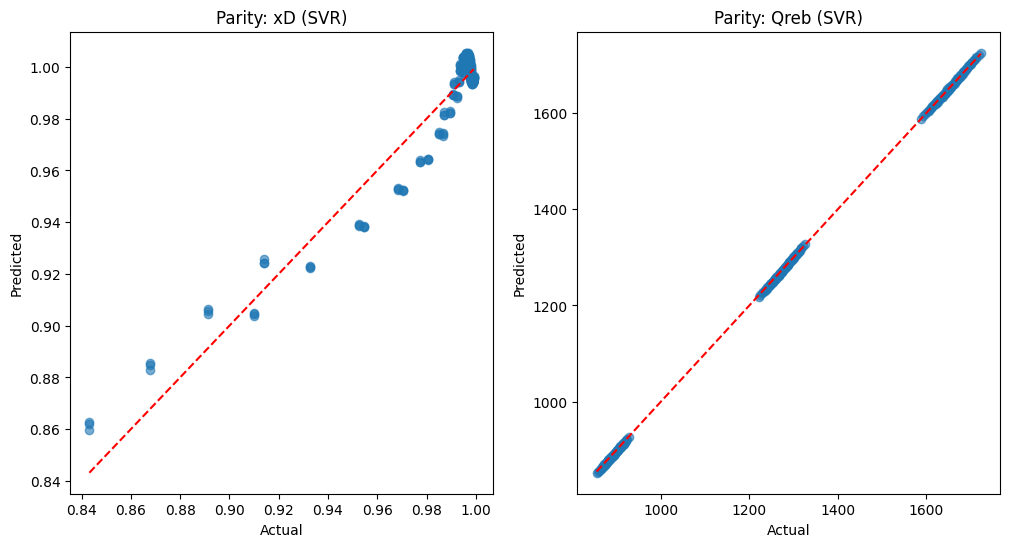

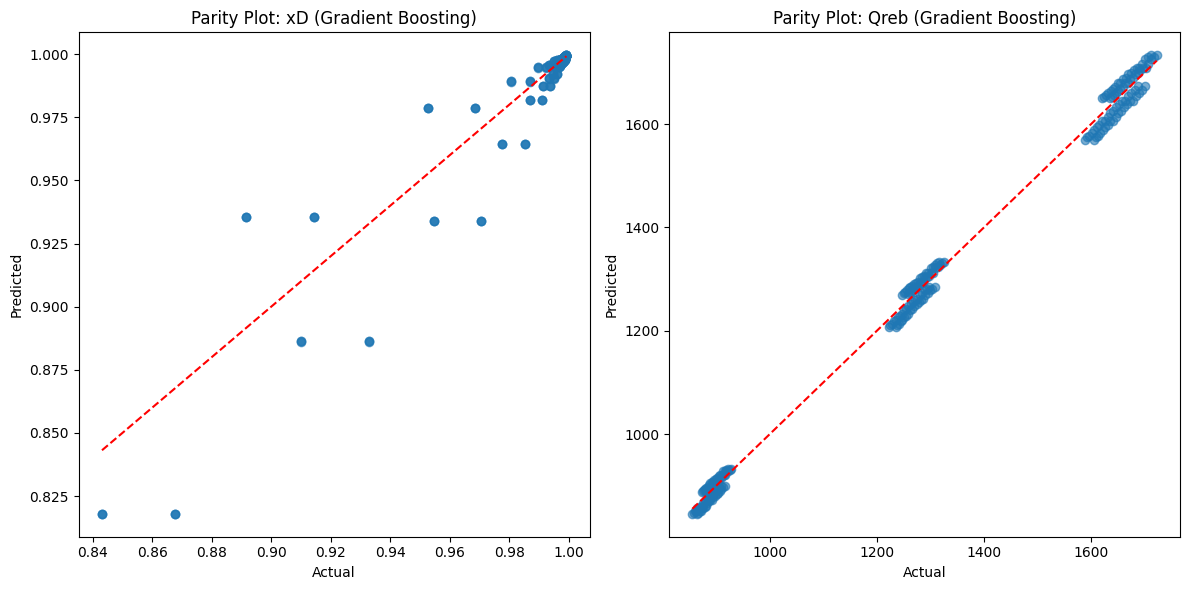

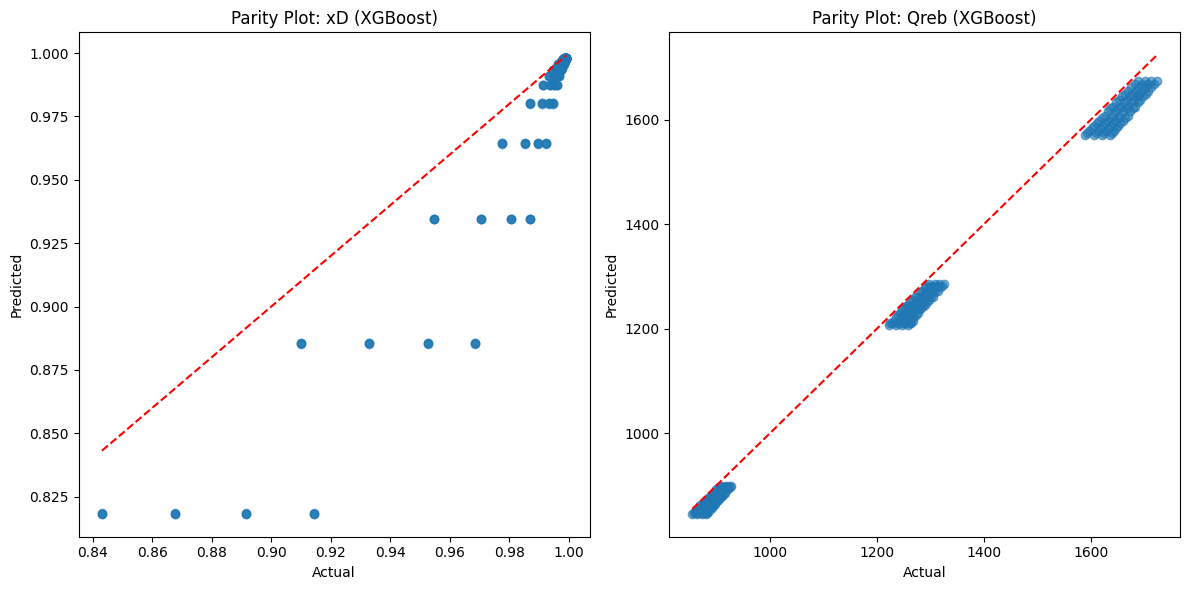

In [51]:
# For SVR
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
parity_plot(y_test["xD"], y_test_pred_svr[:,0], "Parity: xD (SVR)", axes[0])
parity_plot(y_test["Qreb_kW"], y_test_pred_svr[:,1], "Parity: Qreb (SVR)", axes[1])
plt.show()

# --- Gradient Boosting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
parity_plot(y_test["xD"], y_test_pred_gbr[:,0], "Parity Plot: xD (Gradient Boosting)", axes[0])
parity_plot(y_test["Qreb_kW"], y_test_pred_gbr[:,1], "Parity Plot: Qreb (Gradient Boosting)", axes[1])
plt.tight_layout()
plt.show()

# --- XGBoost ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
parity_plot(y_test["xD"], y_test_pred_xgb[:,0], "Parity Plot: xD (XGBoost)", axes[0])
parity_plot(y_test["Qreb_kW"], y_test_pred_xgb[:,1], "Parity Plot: Qreb (XGBoost)", axes[1])
plt.tight_layout()
plt.show()

## Residual Plot

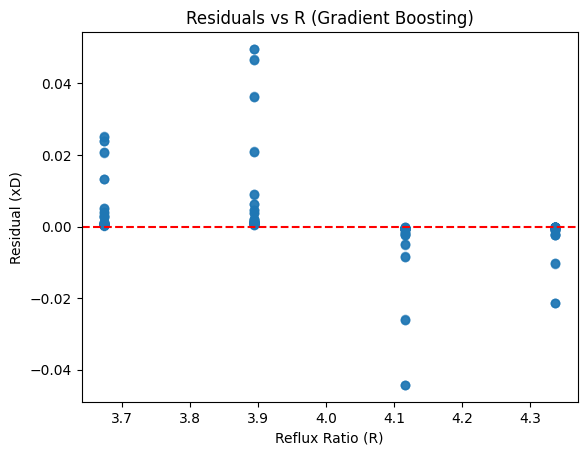

In [52]:
# Residuals for xD
residuals_xD_gbr = y_test["xD"].values - y_test_pred_gbr[:,0]

plt.scatter(X_test["R"], residuals_xD_gbr, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Reflux Ratio (R)")
plt.ylabel("Residual (xD)")
plt.title("Residuals vs R (Gradient Boosting)")
plt.show()


## Sensitivity Plot

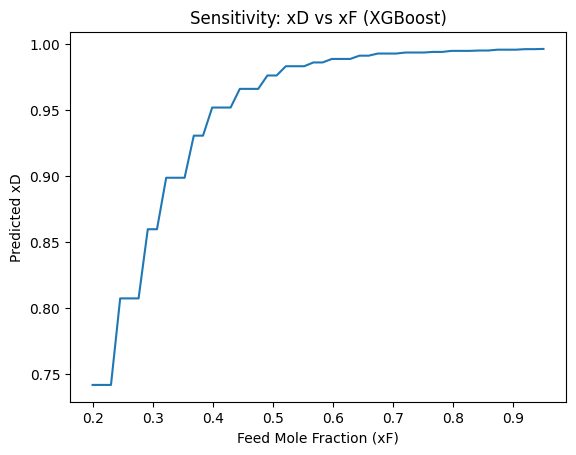

In [53]:
R_fixed = df["R"].median()
F_fixed = df["F_mol_s"].median()

xF_range = np.linspace(df["xF"].min(), df["xF"].max(), 50)
X_sens = pd.DataFrame({"R": R_fixed, "xF": xF_range, "F_mol_s": F_fixed})
X_sens_scaled = scaler_X.transform(X_sens)

y_sens_xgb = scaler_y.inverse_transform(xgb_multi.predict(X_sens_scaled))

plt.plot(xF_range, y_sens_xgb[:,0])
plt.xlabel("Feed Mole Fraction (xF)")
plt.ylabel("Predicted xD")
plt.title("Sensitivity: xD vs xF (XGBoost)")
plt.show()


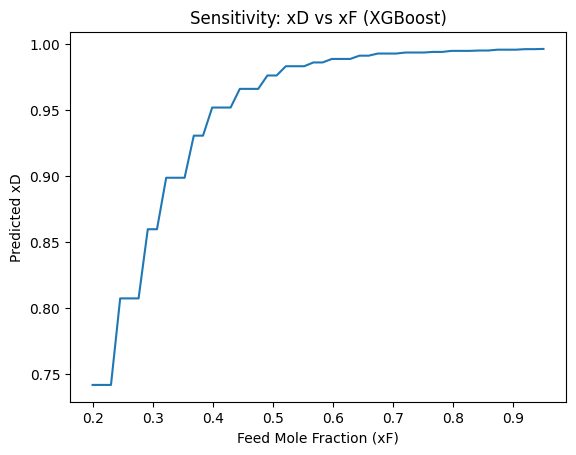

In [54]:
R_fixed = df["R"].median()
F_fixed = df["F_mol_s"].median()

xF_range = np.linspace(df["xF"].min(), df["xF"].max(), 50)
X_sens = pd.DataFrame({"R": R_fixed, "xF": xF_range, "F_mol_s": F_fixed})
X_sens_scaled = scaler_X.transform(X_sens)

y_sens_xgb = scaler_y.inverse_transform(xgb_multi.predict(X_sens_scaled))

plt.plot(xF_range, y_sens_xgb[:,0])
plt.xlabel("Feed Mole Fraction (xF)")
plt.ylabel("Predicted xD")
plt.title("Sensitivity: xD vs xF (XGBoost)")
plt.show()


## High-Purity Slice Analysis

In [55]:
mask_high = y_test["xD"] >= 0.95
mae_high = mean_absolute_error(y_test[mask_high],
                               y_test_pred_xgb[mask_high],
                               multioutput="raw_values")
print("High Purity Region MAE (xD, Qreb):", mae_high)


High Purity Region MAE (xD, Qreb): [7.4669993e-03 2.8765442e+01]
